# Analysis of Placement Data and Findings


### Introduction

The purpose of this analysis is to unveil the determinants influencing student placements. By delving into academic scores, specialization options, work experiences, and other key attributes, we aim to pinpoint the factors that dictate placement outcomes and the range of salary offers made.


### Data Overview

Before diving into any analysis, it's essential to understand the structure and nature of our dataset. Let's import the dataset and take a quick look at the initial rows to gather some basic insights.


In [4]:
import pandas as pd

placement_data = pd.read_csv('Placement_Data_Full_Class (1).csv')
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0



### Findings from the Placement Dataset

#### 1. Dataset Structure
- The dataset consists of 215 entries and 15 features.
- The features encompass details such as:
    - **sl_no**: Serial number
    - **gender**: Gender (M/F)
    - **ssc_p**: 10th Grade Percentage
    - **ssc_b**: SSC Board (Central/Others)
    - **hsc_p**: 12th Grade Percentage
    - **hsc_b**: HSC Board (Central/Others)
    - **hsc_s**: Higher Secondary Education Specialization
    - **degree_p**: Degree Percentage
    - **degree_t**: Undergraduate Degree Type
    - **workex**: Work Experience (Yes/No)
    - **etest_p**: E-test Percentage
    - **specialisation**: MBA Specialization (Mkt&HR/Mkt&Fin)
    - **mba_p**: MBA Percentage
    - **status**: Placement Status (Placed/Not Placed)
    - **salary**: Offered Salary (if placed)

#### 2. Missing Values
- Every column is complete, with the exception of the 'salary' column, which has 67 missing values. This is expected, as students who were not placed would not have a salary value.

#### 3. Duplicates
- No duplicate rows were found in the dataset.

#### 4. Potential Outliers
- **degree_p**: 1 potential outlier
- **hsc_p**: 8 potential outliers
- **salary**: 15 potential outliers
  (Note: Outliers were identified using the IQR method.)

#### 5. Categorical Insights
- **gender**: Male (M) or Female (F)
- **ssc_b**: Others or Central
- **hsc_b**: Others or Central
- **hsc_s**: Commerce, Science, Arts
- **degree_t**: Sci&Tech, Comm&Mgmt, Others
- **workex**: No, Yes
- **specialisation**: Mkt&HR, Mkt&Fin
- **status**: Placed, Not Placed

#### 6. Summary Statistics
- The average secondary education percentage (ssc_p) is ~67.3%, with a range of 40.89% to 89.4%.
- The average higher secondary education percentage (hsc_p) is ~66.33%, with a range from 37% to 97.7%.
- The degree percentage (degree_p) averages at 66.37%.
- The mean E-test percentage (etest_p) stands at 72.1%.
- The MBA percentage (mba_p) averages around 62.28%.
- For the placed students, the average salary offered is approximately 288,655 with a standard deviation of 93,457. The highest salary offered reaches 940,000, while the lowest is 200,000.


## Gender Distribution, Placement Status, and SSC-HSC Percentages Distribution.

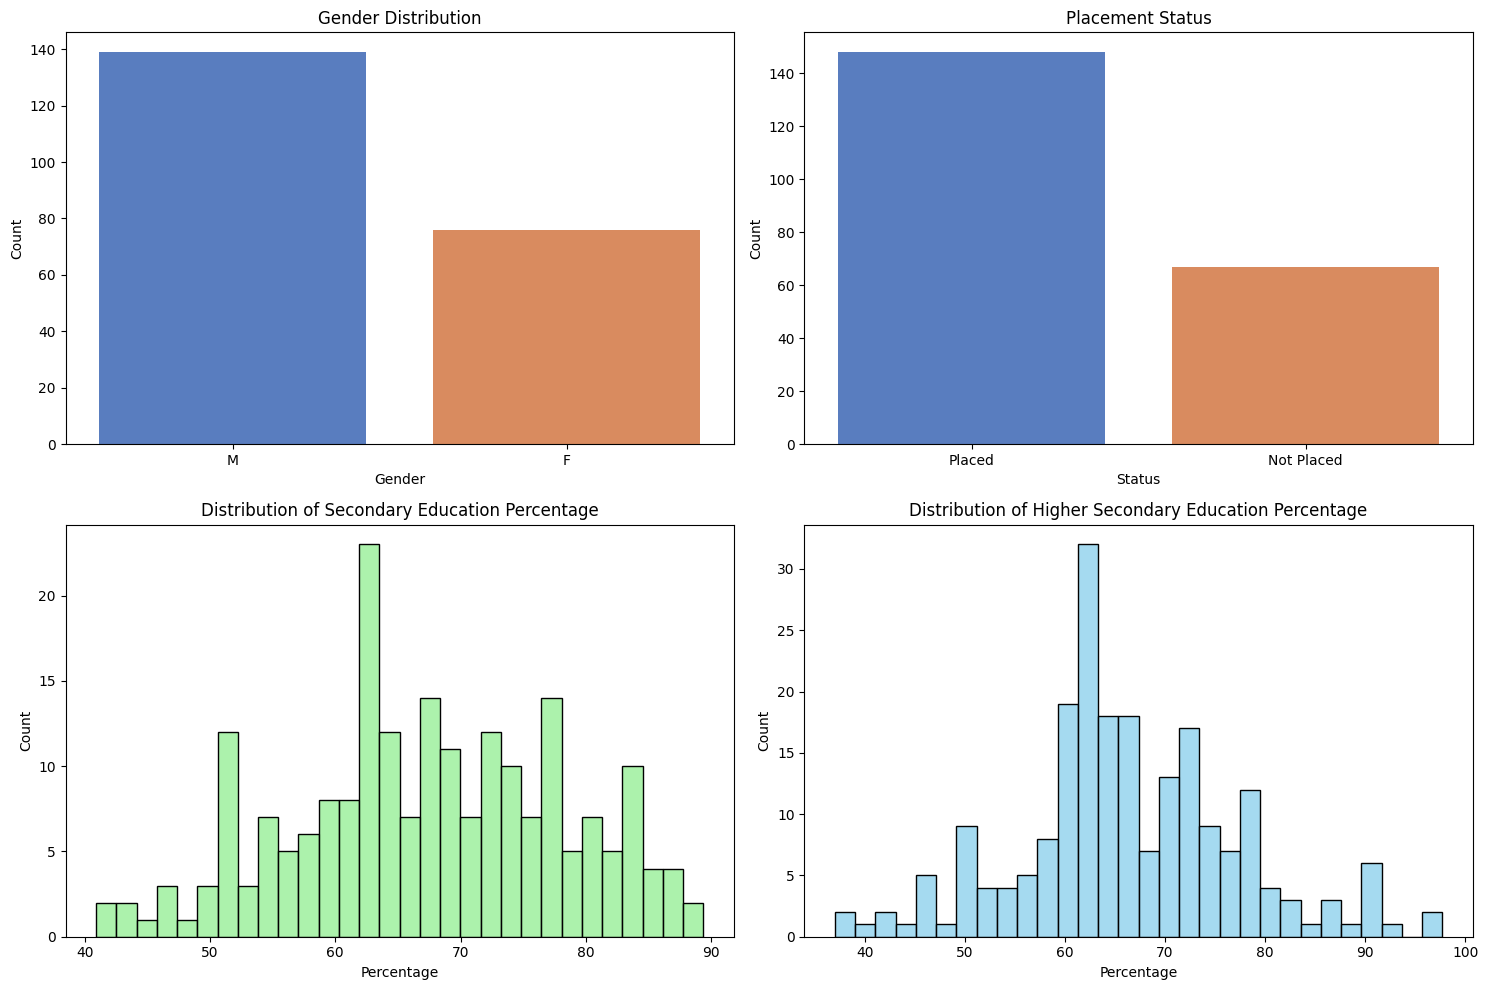

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for visualizations
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot gender distribution
sns.countplot(x='gender', data=placement_data, ax=ax[0][0], palette='muted')
ax[0][0].set_title('Gender Distribution')
ax[0][0].set_xlabel('Gender')
ax[0][0].set_ylabel('Count')

# Plot placement status
sns.countplot(x='status', data=placement_data, ax=ax[0][1], palette='muted')
ax[0][1].set_title('Placement Status')
ax[0][1].set_xlabel('Status')
ax[0][1].set_ylabel('Count')

# Distribution of Secondary Education percentage
sns.histplot(placement_data['ssc_p'], bins=30, ax=ax[1][0], color='lightgreen')
ax[1][0].set_title('Distribution of Secondary Education Percentage')
ax[1][0].set_xlabel('Percentage')
ax[1][0].set_ylabel('Count')

# Distribution of Higher Secondary Education percentage
sns.histplot(placement_data['hsc_p'], bins=30, ax=ax[1][1], color='skyblue')
ax[1][1].set_title('Distribution of Higher Secondary Education Percentage')
ax[1][1].set_xlabel('Percentage')
ax[1][1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

### Observations from the Visualizations:

#### Gender Distribution:
- The number of male students is higher than the number of female students in this dataset.

#### Placement Status:
- The majority of students have been placed.

#### Distribution of Secondary Education Percentage:
- The distribution of Secondary Education percentages (10th Grade scores) appears to be slightly left-skewed.
- Most students have scores ranging between 60% and 90%.

#### Distribution of Higher Secondary Education Percentage:
- The distribution for Higher Secondary Education percentages (12th Grade scores) is more spread out than the 10th Grade scores.
- While the majority still lies between 60% and 90%, there's a noticeable number of students with scores below 60%.

To understand if there are any patterns or trends related to placements let us explore the relationships between placement status and other key factors, such as educational percentages and work experience.


- The distribution of secondary education percentage (SSC Percentage) indicates that most students have their percentages between 60% and 90%, with a peak seen around 65-70%.
- The distribution of higher secondary education percentage (HSC Percentage) is spread between 60% and 80% for a majority of students.


## Relationship between Percentages of 10th, 12th, Undergraduate Degree, and Work Experience on Placement Status.

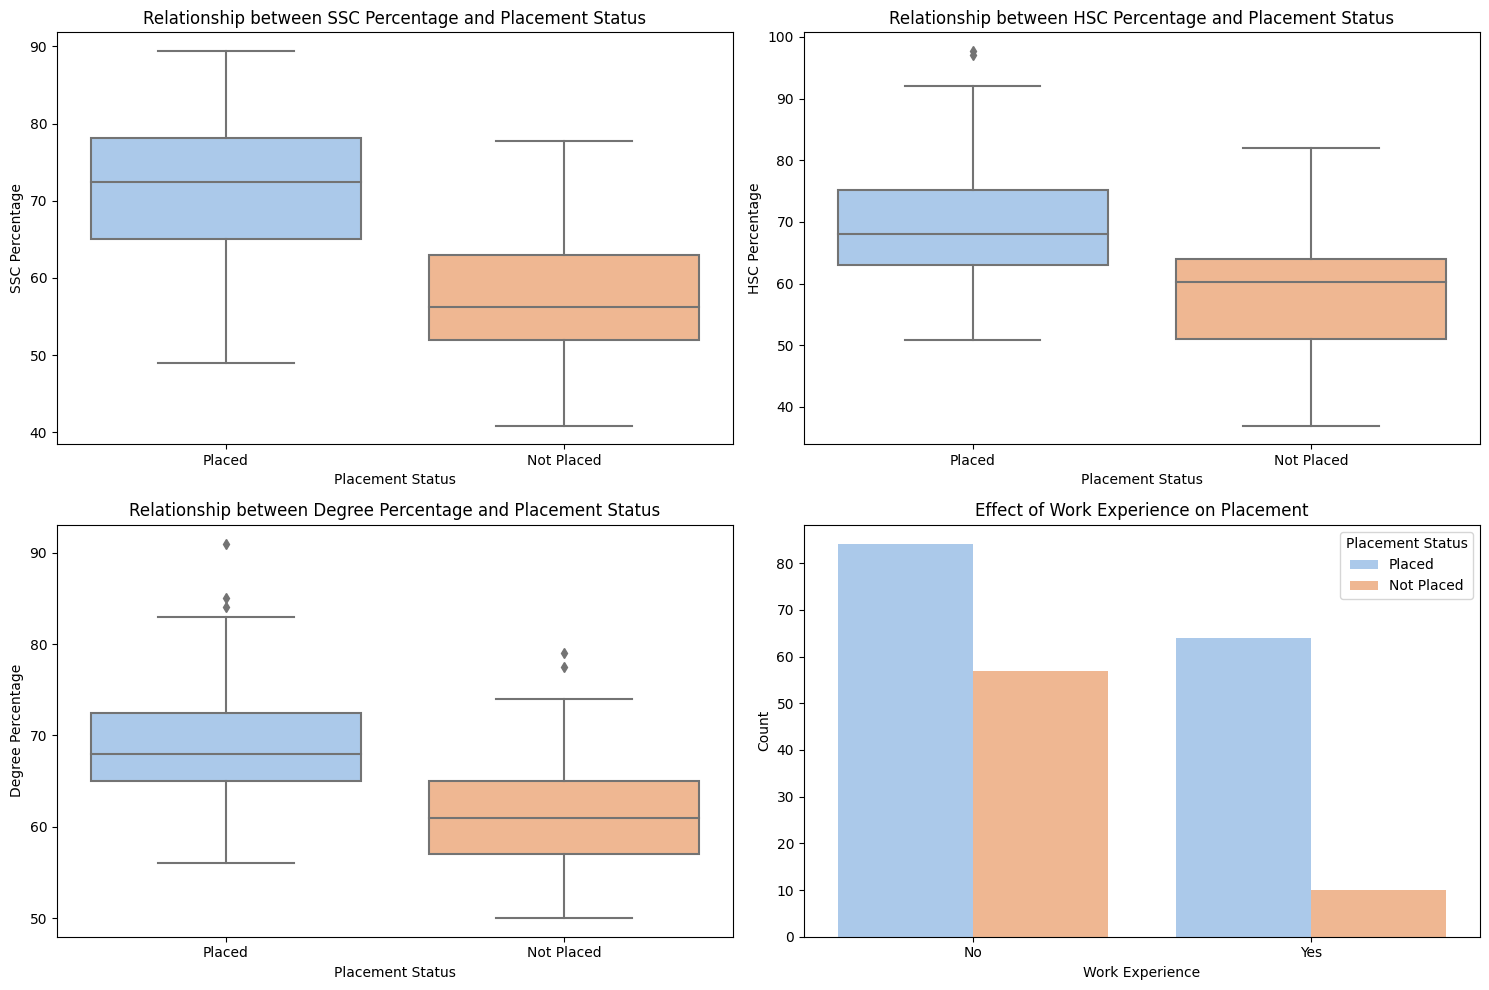

In [8]:
# Create subplots for further visualizations
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Relationship between SSC percentage and placement status
sns.boxplot(x='status', y='ssc_p', data=placement_data, ax=ax[0][0], palette='pastel')
ax[0][0].set_title('Relationship between SSC Percentage and Placement Status')
ax[0][0].set_xlabel('Placement Status')
ax[0][0].set_ylabel('SSC Percentage')

# Relationship between HSC percentage and placement status
sns.boxplot(x='status', y='hsc_p', data=placement_data, ax=ax[0][1], palette='pastel')
ax[0][1].set_title('Relationship between HSC Percentage and Placement Status')
ax[0][1].set_xlabel('Placement Status')
ax[0][1].set_ylabel('HSC Percentage')

# Relationship between Degree percentage and placement status
sns.boxplot(x='status', y='degree_p', data=placement_data, ax=ax[1][0], palette='pastel')
ax[1][0].set_title('Relationship between Degree Percentage and Placement Status')
ax[1][0].set_xlabel('Placement Status')
ax[1][0].set_ylabel('Degree Percentage')

# Effect of Work Experience on Placement
sns.countplot(x='workex', hue='status', data=placement_data, ax=ax[1][1], palette='pastel')
ax[1][1].set_title('Effect of Work Experience on Placement')
ax[1][1].set_xlabel('Work Experience')
ax[1][1].set_ylabel('Count')
ax[1][1].legend(title='Placement Status')

# Adjust the layout
plt.tight_layout()
plt.show()

### Observations from the Visualizations:

#### Relationship between SSC Percentage and Placement Status:
- Students with higher Secondary Education (10th Grade) percentages are more likely to be placed.
- The median score of placed students is higher than that of non-placed students.

#### Relationship between HSC Percentage and Placement Status:
- A similar trend is observed with Higher Secondary Education (12th Grade) percentages.
- Students with higher 12th Grade percentages tend to have a better chance of getting placed.

#### Relationship between Degree Percentage and Placement Status:
- Again, students with higher undergraduate degree percentages are more likely to be placed.
- The difference in medians between placed and non-placed students is evident.

#### Effect of Work Experience on Placement:
- Students with prior work experience have a higher placement rate compared to those without.
- Interestingly, while there are fewer students with work experience in the dataset, their placement success rate is notably high.

From the above visualizations, it's clear that academic performance (in terms of percentages) plays a significant role in placement opportunities. Additionally, having work experience seems to boost the chances of getting placed.


- The interquartile range (IQR) for the SSC, HSC, and degree percentages for placed students is relatively narrow, suggesting that the scores for the majority of placed students are clustered around the median. This might imply a threshold of academic performance that recruiters prefer.
- The presence of work experience seems to have a positive impact on placement chances. This aligns with the general understanding that prior work experience can enhance a candidate's employability.



- While academic performance in SSC, HSC, and degree courses seems to influence placement, the MBA and E-test percentages do not show a clear distinction between placed and non-placed students.
- The choice of MBA specialization appears to play a role in placements. Students specializing in Marketing & Finance have a clear edge over their counterparts in Marketing & HR.



- The interquartile range (IQR) for the SSC, HSC, and degree percentages for placed students is relatively narrow, suggesting that the scores for the majority of placed students are clustered around the median. This might imply a threshold of academic performance that recruiters prefer.
- The presence of work experience seems to have a positive impact on placement chances. This aligns with the general understanding that prior work experience can enhance a candidate's employability.



- While academic performance in SSC, HSC, and degree courses seems to influence placement, the MBA and E-test percentages do not show a clear distinction between placed and non-placed students.
- The choice of MBA specialization appears to play a role in placements. Students specializing in Marketing & Finance have a clear edge over their counterparts in Marketing & HR.


## Relationship of MBA percentage, specialization and E-test percentage on Placement Status.


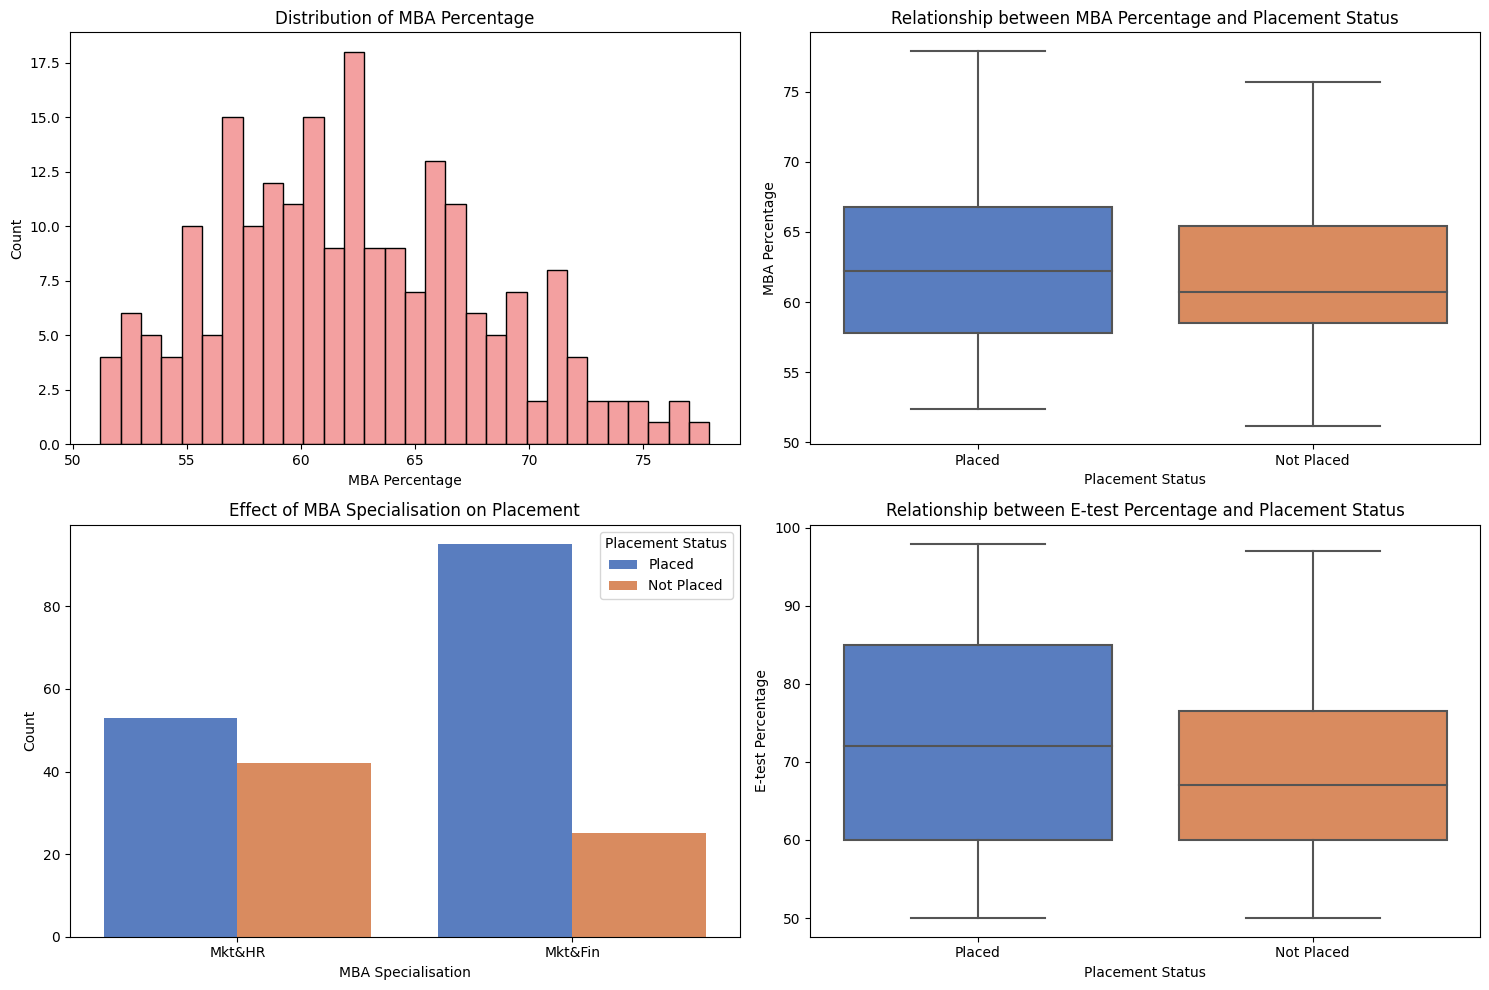

In [9]:
# Create subplots for further visualizations
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution of MBA percentage
sns.histplot(placement_data['mba_p'], bins=30, ax=ax[0][0], color='lightcoral')
ax[0][0].set_title('Distribution of MBA Percentage')
ax[0][0].set_xlabel('MBA Percentage')
ax[0][0].set_ylabel('Count')

# Relationship between MBA percentage and placement status
sns.boxplot(x='status', y='mba_p', data=placement_data, ax=ax[0][1], palette='muted')
ax[0][1].set_title('Relationship between MBA Percentage and Placement Status')
ax[0][1].set_xlabel('Placement Status')
ax[0][1].set_ylabel('MBA Percentage')

# Relationship between MBA specialization and placement status
sns.countplot(x='specialisation', hue='status', data=placement_data, ax=ax[1][0], palette='muted')
ax[1][0].set_title('Effect of MBA Specialisation on Placement')
ax[1][0].set_xlabel('MBA Specialisation')
ax[1][0].set_ylabel('Count')
ax[1][0].legend(title='Placement Status')

# Relationship between E-test percentage and placement status
sns.boxplot(x='status', y='etest_p', data=placement_data, ax=ax[1][1], palette='muted')
ax[1][1].set_title('Relationship between E-test Percentage and Placement Status')
ax[1][1].set_xlabel('Placement Status')
ax[1][1].set_ylabel('E-test Percentage')

# Adjust the layout
plt.tight_layout()
plt.show()

### Observations from the Visualizations:

#### 1. Distribution of MBA Percentage:
- The MBA percentage distribution appears to be somewhat normal, with most students having scores ranging between 55% and 75%.

#### 2. Relationship between MBA Percentage and Placement Status:
- The MBA percentage does not seem to have a significant impact on placement status.
- Both placed and non-placed students have overlapping and similar distributions in terms of MBA percentages. The medians are also closely situated.

#### 3. Effect of MBA Specialisation on Placement:
- Students specializing in Marketing & Finance (Mkt&Fin) have a higher placement rate compared to those specializing in Marketing & HR (Mkt&HR).

#### 4. Relationship between E-test Percentage and Placement Status:
- The E-test percentages also don't seem to show a pronounced difference between placed and non-placed students.
- However, a subtle observation is that the upper quartile of placed students tends to have a slightly higher E-test percentage.

From the analysis, while MBA percentages and E-test percentages do not show a significant influence on placement status, the choice of MBA specialization seems to play a role, with a preference towards Marketing & Finance.

Next, let us look into the salary distributions for those who were placed and see if there's any correlation between the salary offered and other factors like academic performances or MBA specialisation.

## Salary Distribution and Salary Distribution by MBA Specialization

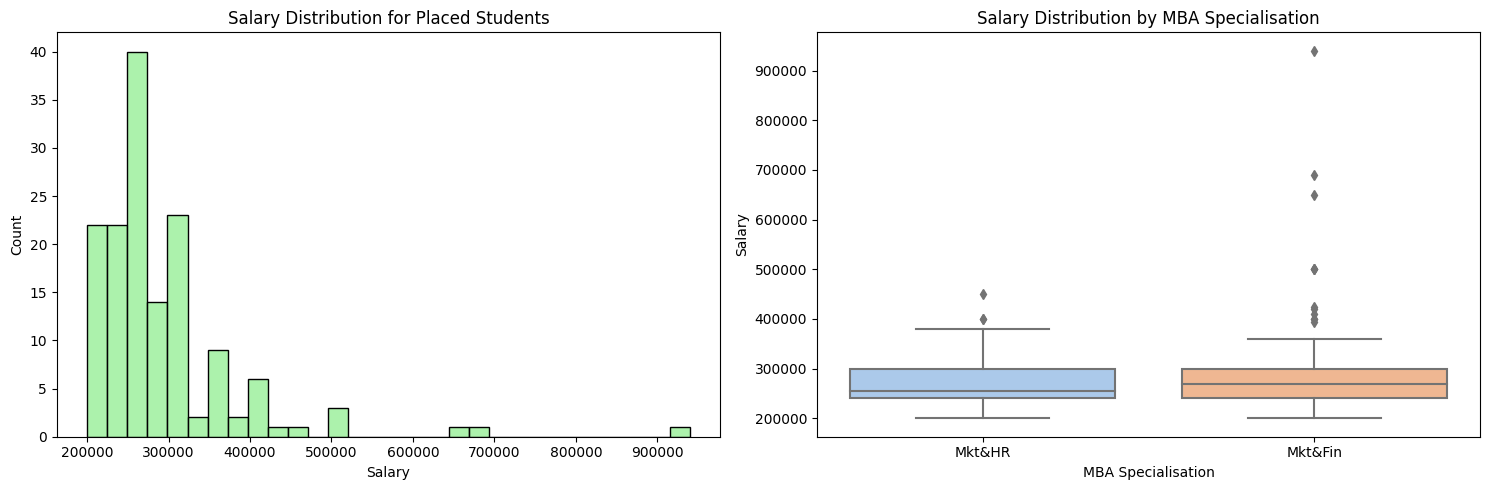

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Distribution of salary for placed students
sns.histplot(placement_data[placement_data['status'] == 'Placed']['salary'], bins=30, ax=ax[0], color='lightgreen')
ax[0].set_title('Salary Distribution for Placed Students')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Count')

# Distribution of salary for placed students by MBA Specialization
sns.boxplot(x='specialisation', y='salary', data=placement_data[placement_data['status'] == 'Placed'], ax=ax[1], palette='pastel')
ax[1].set_title('Salary Distribution by MBA Specialisation')
ax[1].set_xlabel('MBA Specialisation')
ax[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()

###Salary Distribution for Placed Students:
- Most of the placed students have a salary range between 200,000 and 400,000.
- There are a few students with notably higher salaries, which can be considered as outliers or top offers.

###Salary Distribution by MBA Specialisation:
- Students specializing in Marketing & Finance (Mkt&Fin) tend to receive slightly higher median salaries compared to those specializing in Marketing & HR (Mkt&HR).
- The salary range also seems wider for the Mkt&Fin group.

## Relationship between SSC and MBA percentage on Salary

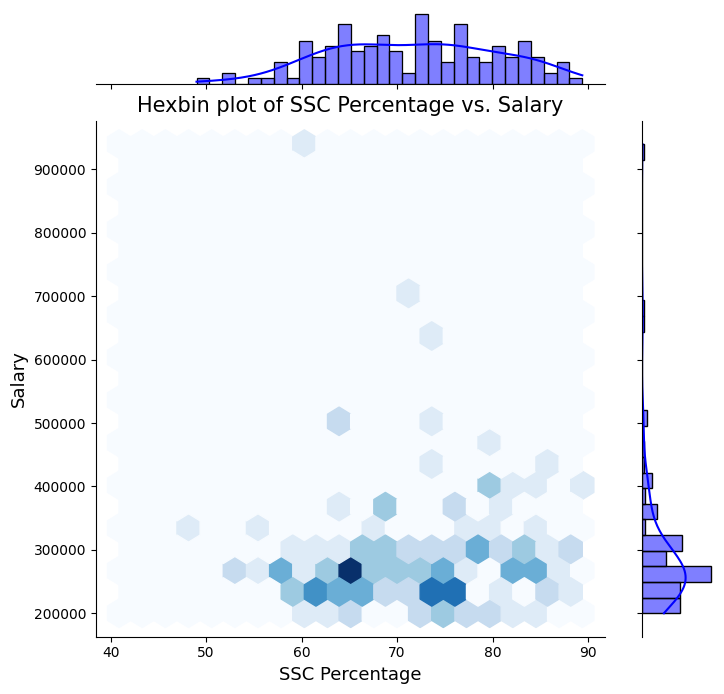

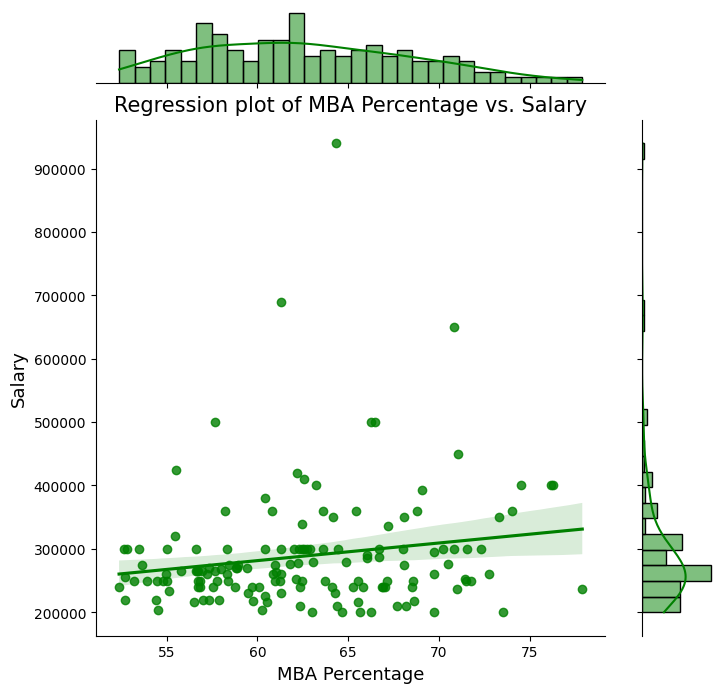

In [11]:


# Hexbin plot for SSC Percentage vs. Salary
grid1 = sns.JointGrid(data=placement_data[placement_data['status'] == 'Placed'], x='ssc_p', y='salary', height=7, space=0.5)
grid1.plot_joint(plt.hexbin, gridsize=20, cmap='Blues', extent=[placement_data['ssc_p'].min(), placement_data['ssc_p'].max(), placement_data['salary'].min(), placement_data['salary'].max()])
title1 = grid1.ax_joint.set_title('Hexbin plot of SSC Percentage vs. Salary', fontsize=15)
title1.set_position([.5, 1.05])
grid1.ax_joint.set_xlabel('SSC Percentage', fontsize=13)
grid1.ax_joint.set_ylabel('Salary', fontsize=13)
grid1.plot_marginals(sns.histplot, color='blue', bins=30, kde=True)



# Regression plot for MBA Percentage vs. Salary
grid2 = sns.JointGrid(data=placement_data[placement_data['status'] == 'Placed'], x='mba_p', y='salary', height=7, space=0.5)
grid2.plot_joint(sns.regplot, color='green')
title2 = grid2.ax_joint.set_title('Regression plot of MBA Percentage vs. Salary', fontsize=15)
title2.set_position([.5, 1.05])
grid2.ax_joint.set_xlabel('MBA Percentage', fontsize=13)
grid2.ax_joint.set_ylabel('Salary', fontsize=13)
grid2.plot_marginals(sns.histplot, color='green', bins=30, kde=True)

plt.show()

###Hexbin plot of SSC Percentage vs. Salary:
- The hexbin plot provides a binned representation of the data, showing the density of students based on their SSC percentages and salaries.
- This representation is useful for datasets where scatter points overlap significantly.
- The darker hexagons show a higher concentration of students.
- The plot indicates that many students with SSC percentages around 60-80% have salaries in the range of 2-4 lakhs.

###Regression plot of MBA Percentage vs. Salary:
- This plot provides a linear regression fit over the data points to show the relationship between MBA percentages and salaries.
- The shaded region around the regression line represents the confidence interval for the regression estimate.
- The plot suggests that there's a mild positive correlation between MBA percentage and salary, but the relationship isn't very pronounced.

## Correlation Heatmap and relationship between Gender, Work Experience and Board of Education(SSC) on Salary

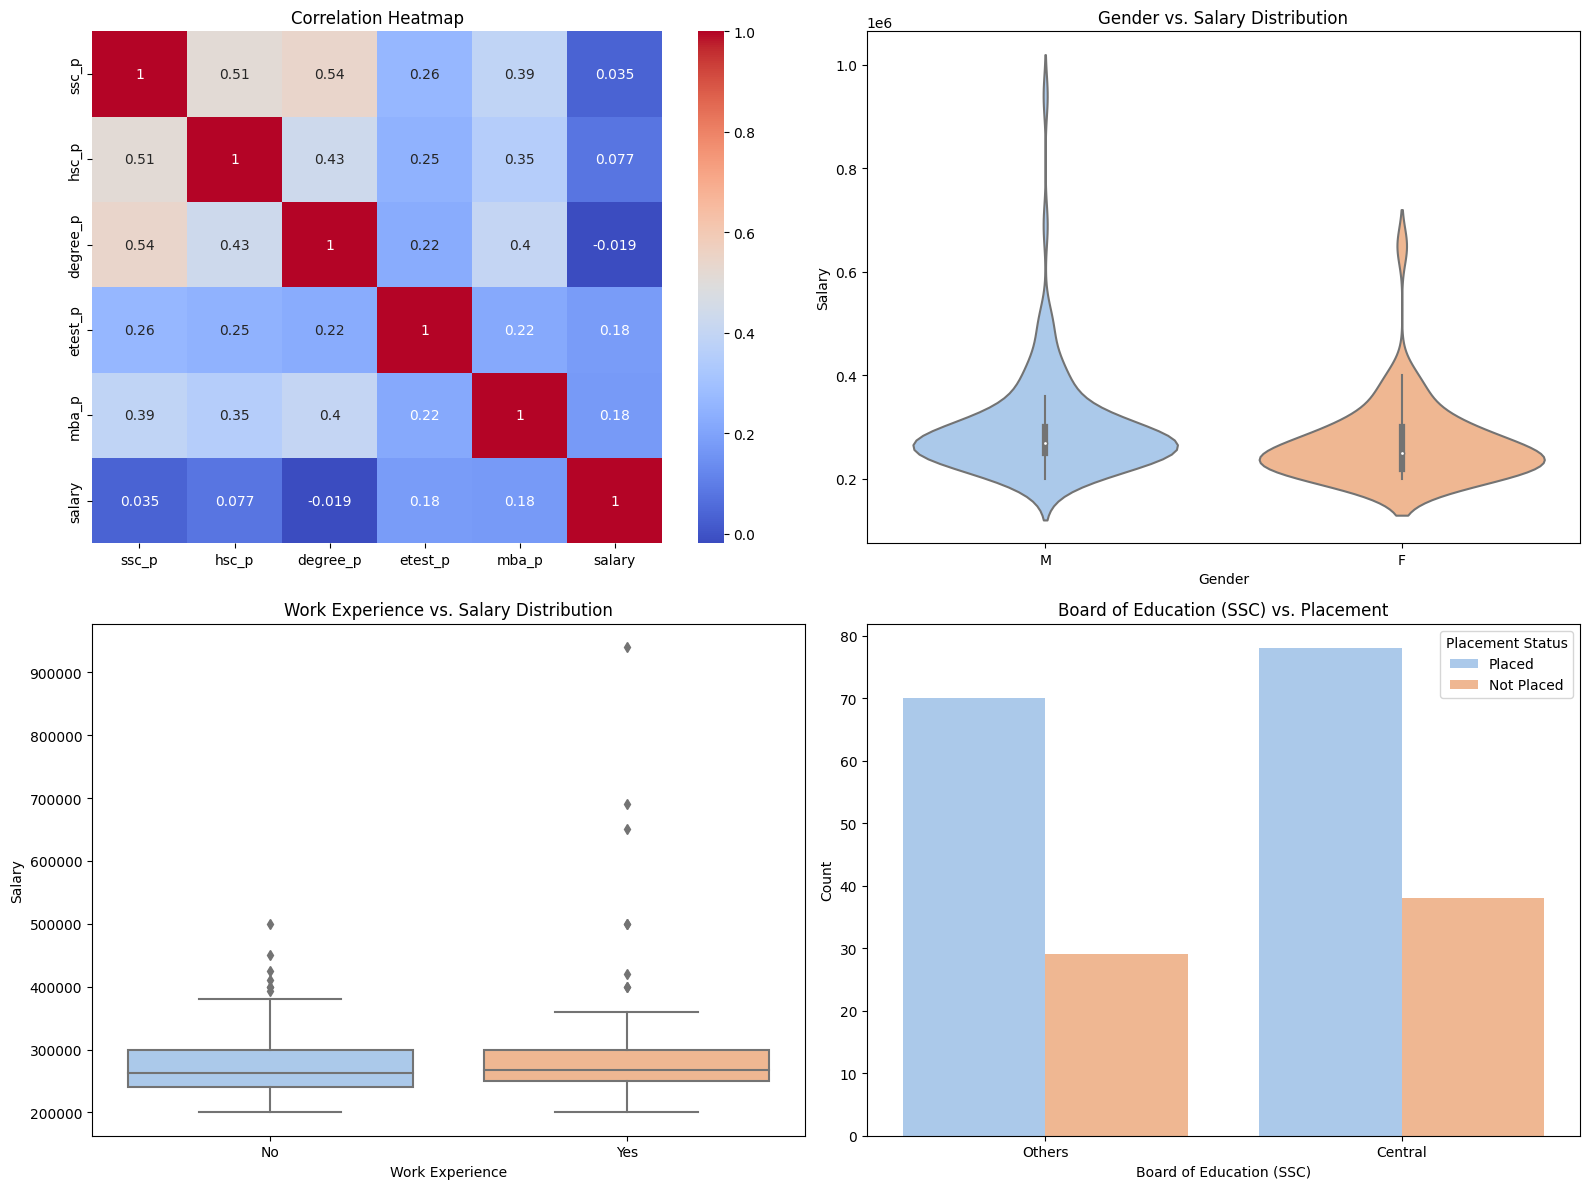

In [12]:
# Create subplots for further visualizations
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Correlation Heatmap
corr_matrix = placement_data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax[0][0])
ax[0][0].set_title('Correlation Heatmap')

# Gender vs Salary
sns.violinplot(x='gender', y='salary', data=placement_data[placement_data['status'] == 'Placed'], ax=ax[0][1], palette='pastel')
ax[0][1].set_title('Gender vs. Salary Distribution')
ax[0][1].set_xlabel('Gender')
ax[0][1].set_ylabel('Salary')

# Work Experience vs Salary
sns.boxplot(x='workex', y='salary', data=placement_data[placement_data['status'] == 'Placed'], ax=ax[1][0], palette='pastel')
ax[1][0].set_title('Work Experience vs. Salary Distribution')
ax[1][0].set_xlabel('Work Experience')
ax[1][0].set_ylabel('Salary')

# Board of Education (SSC) vs Placement
sns.countplot(x='ssc_b', hue='status', data=placement_data, ax=ax[1][1], palette='pastel')
ax[1][1].set_title('Board of Education (SSC) vs. Placement')
ax[1][1].set_xlabel('Board of Education (SSC)')
ax[1][1].set_ylabel('Count')
ax[1][1].legend(title='Placement Status')

# Adjust the layout
plt.tight_layout()
plt.show()

###1. Correlation Heatmap:

- ssc_p (SSC Percentage) has the highest correlation with salary, although it's still moderate.
- This suggests that students with higher 10th grade scores might receive better salary offers.
- hsc_p (HSC Percentage) and degree_p (Degree Percentage) also show a positive correlation with the salary, but it's weaker compared to the SSC Percentage.

###2. Gender vs. Salary Distribution:

- The salary distributions for both male and female students overlap considerably.
- However, a slightly wider range of salaries can be observed for male students, indicating a few higher offers.

###3. Work Experience vs. Salary Distribution:

- Students with prior work experience tend to get slightly higher median salaries compared to those without work experience.
- The range of salaries for students with work experience is also broader.

###4. Board of Education (SSC) vs. Placement:

- The board of education (either Central or Others) in SSC doesn't seem to have a significant impact on placement status.
- Both categories have a similar ratio of placed to not placed students.
- From these insights, it's evident that while academic performances are influential in determining placement chances, the salary offers are influenced by a combination of factors, including gender, work experience, and academic scores.
- However, the board of education during one's secondary schooling doesn't seem to significantly affect placement outcomes.

## Summary and Conclusion

### Gender Distribution:
There's a noticeable difference in the number of male students compared to female students. Despite this imbalance, it's essential to look beyond mere counts and understand the underlying trends in placements and academic performance.

### Placement Status:
Most students in the dataset have been placed. This is an encouraging trend, indicating that the majority of students from this institution find employment opportunities.

### Academic Performance:
Upon examination of the distributions for secondary and higher secondary education percentages, it's evident that most students have scores ranging between 60% and 90%. While the distribution of 10th grade scores is slightly left-skewed, the 12th grade scores are more spread out, with a noticeable number of students scoring below 60%.

### Influence of Academic Percentages on Placements:
One of the most striking findings is the direct correlation between academic performance and placement success. Students with higher percentages in 10th, 12th, and undergraduate studies are more likely to get placed. The data suggests that recruiters give significant importance to academic merit when selecting candidates.

### Work Experience and Placements:
Although the number of students with prior work experience is relatively small, their placement rate is impressive. This trend underscores the value employers place on work experience, viewing it as an indicator of a candidate's practical understanding and industry readiness.

### MBA Performance and Specialization:
Interestingly, the MBA percentage doesn't seem to hold as much sway over placement success as prior academic scores. Both placed and non-placed students have similar MBA percentage distributions. However, specialization does play a role. Students specializing in Marketing & Finance tend to have a higher placement rate compared to those in Marketing & HR.

### E-test Performance:
The E-test scores don't exhibit a pronounced difference between placed and non-placed students, though there's a subtle hint that students in the upper quartile of scores have better placement success.

### Salary Trends:
The salary distribution for placed students reveals that most offers lie in the 2-4 lakhs range. Further, when analyzing the relationship between academic scores and salaries, there's an observable trend where higher academic scores, especially in the 10th and 12th grades, correlate with higher salary offers. However, MBA percentages don't show a strong correlation with salary.

### Visualization Insights:
Through hexbin plots and regression plots, we got a clearer view of the relationships between different parameters and salaries. The hexbin plot for SSC Percentage vs. Salary highlighted a high concentration of students in the 60-80% SSC score range getting salaries between 2-4 lakhs. The regression plot for MBA Percentage vs. Salary indicated a mild positive correlation but not a very pronounced one.

### Conclusion:
The analysis provides several crucial takeaways for both institutions and students. For educational institutions, there's a clear indication that maintaining and further enhancing academic rigor and standards can significantly improve placement rates. Encouraging students to gain work experience, possibly through internships or cooperative education programs, can also bolster their employment prospects.

For students, the message is clear: academic performance, especially in earlier years, plays a significant role in determining placement success. However, selecting the right MBA specialization and gaining work experience can also provide a competitive edge in the job market.